# Introduction

<img src="sprocket.png" alt="company logo" style="float: right; margin-left: 10px;" />

In this notebook, we'll be examining data from Sprocket Central Pty Ltd, an organization that specialising in high quality bikes and cycling accessories. They've shared an Excel file with us that contains three crucial pieces of information: details about their customers' demographics, their addresses and transactions made.

Our task is to assess the quality of this data across several key dimensions: how accurate it is, whether it's complete, if it's consistent across different sections, how current the information is, its relevance to our goals, its validity, and whether each piece of information is unique. By doing so, our aim is to ensure the data is reliable enough for the marketing team to accurately identify and target potential top customers.

We will thoroughly review each dataset to check for errors, gaps, inconsistencies, outdated information, and irrelevancies. This will help us to confirm that the information is correct, up to date, and applicable to our needs. Ultimately, this process will enable us to pinpoint which customers are most likely to be interested in buying Sprocket Central's bicycles, aiding the company in its growth efforts by focusing on the most promising leads.

After cleaning the datasets, we will use this data to derive actionable insights into customer trends and behaviors. The main goal of our analysis is centered on the identification of high-value customers from a newly acquired customer list. These individuals, having no prior transactions with Sprocket Central, represent untapped potential for the company. By pinpointing the most promising leads—those who exhibit characteristics aligning with the company's successful customer profiles—we aim to strategically enhance Sprocket Central's growth and market presence through targeted marketing initiatives.

# Data Preprocessing

## Customer Demographic

In this section of our analysis, we will dive into the Customer Demographic dataset. This part of the assessment will involve a detailed examination of the data to ensure that customer profiles are accurately captured, including age, gender, past purchasing behavior, and other demographic details that are crucial for targeted marketing efforts.

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from datetime import datetime as dt

In [2]:
CustomerDemographic = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx', 
                                    sheet_name='CustomerDemographic',
                                    skiprows=1) 
CustomerDemographic.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


Below is a brief explanation of each variable in the **Customer Demographic** dataset:

- `customer_id`: A unique identifier for each customer. 
- `first_name`: The customer's first name.
- `last_name`: The customer's surname.
- `gender`: The gender of the customer. 
- `past_3_years_bike_related_purchases`: Indicates the number of bike-related purchases made by the customer in the past three years.
- `DOB`: Date of Birth of the customer, formatted as 'YYYY-MM-DD'.
- `job_title`: The customer's job title at their workplace.
- `job_industry_category`: The industry sector in which the customer works, such as 'Health', 'Financial Services', 'Property', 'IT', etc.
- `wealth_segment`: Categorizes customers based on their wealth, with values like 'Mass Customer', 'Affluent Customer', etc., indicating spending power.
- `deceased_indicator`: Indicates whether the customer is deceased ('N' for no, 'Y' for yes).
- `default`: Contains miscellaneous or potentially incorrect data. Some entries may include scripting or nonsensical strings, suggesting data quality issues.
- `owns_car`: Indicates whether the customer owns a car ('Yes' or 'No'), which can be relevant for market segmentation and targeting.
- `tenure`: The number of years the customer has been associated with the company, represented in years. This can be indicative of customer loyalty or longevity of the relationship.

In [3]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

This dataset summary reveals that the DataFrame consists of **4000** entries and **13** columns. Notably, there are missing values in columns such as `last_name`, `DOB`, `job_title`, `job_industry_category`, and `default`, necessitating data cleaning and imputation strategies to ensure comprehensive analysis. The data types range from integers and floats to objects, indicating a mix of numerical and categorical data. 

### Validity
To ensure the **DOB** column accurately represents dates and facilitates date-based operations, it's essential to convert it to a datetime format.

In [4]:
string_values_mask = CustomerDemographic['DOB'].apply(lambda x: isinstance(x, str))

# Filter the DataFrame to get the rows with string values in the 'DOB' column
string_values_data = CustomerDemographic[string_values_mask]
string_values_data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


Here the `DOB` (Date of Birth) column contains string representations of dates, which is not ideal for date-based operations. It contains a `DOB` value of `1843-12-21`, which is deemed unrealistic for the current customer dataset. These identified rows are subsequently dropped from the main DataFrame to maintain data integrity and consistency. Finally, the `DOB` column is converted to the datetime format.

In [5]:
# Drop the rows with string values
CustomerDemographic = CustomerDemographic.drop(string_values_data.index)

# Convert to Datetime 
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'], errors='coerce')

### Relevancy

In this section we will determine the applicability of each piece of demographic information to the goal of identifying potential customers.

In [6]:
CustomerDemographic['default'].value_counts()

default
100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: count, Length: 90, dtype: int64

The `default` field seems to contain irrelevant or incorrect data, which may not be necessary for the analysis. Therefore we will drop this column.

In [7]:
# Drop irrelevant columns
CustomerDemographic = CustomerDemographic.drop(['default'], axis=1)

In [8]:
CustomerDemographic['deceased_indicator'].value_counts()

deceased_indicator
N    3997
Y       2
Name: count, dtype: int64

The `deceased_indicator` variable variable does not contribute valuable information for the vast majority of the dataset, given that only 2 out of 4000 entries are marked as 'Y', indicating deceased customers. In the context of marketing and customer relationship management, focusing on living customers is paramount. Therefore, these 2 entries could be excluded from further analysis to ensure that marketing strategies and resources are directed towards engaging with and catering to the needs of the living customer base, thereby optimizing the effectiveness and efficiency of marketing efforts.

In [9]:
CustomerDemographic = CustomerDemographic[CustomerDemographic['deceased_indicator'] != 'Y']

### Completeness

In this stage of our analysis, we focus on assessing the completeness of our dataset to ensure that critical demographic information is fully captured.

In [10]:
CustomerDemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [11]:
CustomerDemographic[CustomerDemographic['DOB'].isna()& CustomerDemographic['tenure'].isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


The pattern observed in the CustomerDemographic DataFrame, where both `DOB` (Date of Birth) and `tenure` are missing exclusively for rows where the gender is marked as 'U' (presumably standing for 'Unknown'), suggests that the missingness is not at random **(MNAR - Missing Not At Random)**. It indicates a systematic issue related to the data collection or entry process, particularly concerning customers whose gender has not been specified or is unknown. We will deal with this issue later on in this section.

We will create dynamic mapping for missing `job_industry_category` values based on the unique combinations of `job_title` present within the data. This method involves first filtering out records with no missing values in these two fields, then grouping the remaining data by job title and assigning each title a corresponding industry category. The resulting dictionary serves as a reference to impute missing job industry categories, leveraging the observed relationship between job titles and industry sectors.

In [12]:
mapping = CustomerDemographic.dropna(subset=['job_title', 'job_industry_category']).groupby('job_title')['job_industry_category'].unique().apply(lambda x: x[0]).to_dict()

# Fill missing values based on the dynamic mapping
CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].fillna(CustomerDemographic['job_title'].map(mapping))


We will now impute the missing values in the `job_title` column by considering both the `job_industry_category` and `wealth_segment` of the customers. This process involves identifying the most common `job_title` within each combination of `job_industry_category` and `wealth_segment`. We create a mapping from each unique combination to its corresponding prevalent `job_title`. Then, we apply this mapping to fill in the missing `job_title` entries, ensuring that the imputed job titles are aligned with the respective industry category and wealth segment.

In [13]:
# Group by 'job_industry_category' and 'wealth_segment' to calculate the most common job title for each group
most_common_job_per_category_segment = CustomerDemographic.groupby(['job_industry_category', 
                                                                    'wealth_segment'])['job_title'].agg(lambda x: x.value_counts().idxmax() if not x.value_counts().empty else np.nan)

# Create a dictionary mapping ('job_industry_category', 'wealth_segment') to its corresponding most common job title
most_common_job_title_mapping = {index: job_title for index, job_title in most_common_job_per_category_segment.items()}

# Create a mask for rows where 'job_title' is missing
missing_job_title_mask = CustomerDemographic['job_title'].isnull()

# Use the 'job_industry_category' and 'wealth_segment' of each missing value to impute the most common job title
CustomerDemographic.loc[missing_job_title_mask, 'job_title'] = CustomerDemographic.loc[missing_job_title_mask, ['job_industry_category', 'wealth_segment']].apply(lambda x: most_common_job_title_mapping.get((x['job_industry_category'], x['wealth_segment']), np.nan), axis=1)

In [14]:
CustomerDemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              105
job_industry_category                  105
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

After the imputation process, the dataset still exhibits certain missing values across different columns:

- **87 rows** have both missing `DOB` and `tenure`.
- **105 rows** have both missing `job_title` and `job_industry_category`.
- **125 rows** are missing `last names`.

Leaving the missing last names as is can be justified because customers can still be uniquely identified and profiled using other available information in the dataset, such as customer ID, first name, and additional demographic details.

The rows with both missing `DOB` and `tenure` and the rows with both missing `job_title` and `job_industry_category` will be deleted. This decision is made with the understanding that while deleting data can lead to a loss of information, in this context, these rows contribute to a relatively small percentage of the total dataset. Specifically, the **87 rows** with missing `DOB` and `tenure` represent approximately **2.18%** of the dataset, and the **105 rows** with missing `job_title` and `job_industry_category` account for roughly **2.63%**. Although the removal of these records will slightly reduce the dataset size, it is expected that the overall impact on the analysis will be minimal compared to the potential biases and inaccuracies introduced by attempting to impute or retain these significantly incomplete records. This approach ensures that the remaining dataset is more robust and reliable for further analysis and insights generation.


In [15]:
# Deleting rows with missing DOB
CustomerDemographic = CustomerDemographic.dropna(subset=['DOB'])

# Deleting rows with both missing job_title and job_industry_category
CustomerDemographic = CustomerDemographic.dropna(subset=['job_title'])

# Display the shape of the DataFrame after deletion to confirm the number of remaining rows and columns
CustomerDemographic.shape

(3805, 12)

### Uniqueness

In this section, we examine the uniqueness of the data within the CustomerDemographic DataFrame by identifying duplicate entries.

In [16]:
# Get duplicate rows
CustomerDemographic[CustomerDemographic.duplicated(keep = False)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure


### Accuracy

In this section, we focus on enhancing the accuracy of the CustomerDemographic dataset.

In [17]:
CustomerDemographic['gender'].value_counts()

gender
Female    1975
Male      1827
F            1
Femal        1
M            1
Name: count, dtype: int64

The initial analysis reveals inconsistencies in gender representation, with multiple labels such as 'F', 'Femal', 'M', etc., referring to the same gender categories. We will map the diverse gender labels to standardized 'Female' and 'Male' categories.

In [18]:
# Standardize 'Gender' labels
gender_mapping = {
    'F': 'Female',
    'Femal': 'Female',
    'Female': 'Female',
    'M': 'Male',
    'Male': 'Male',
}
CustomerDemographic['gender'] = CustomerDemographic['gender'].map(gender_mapping)

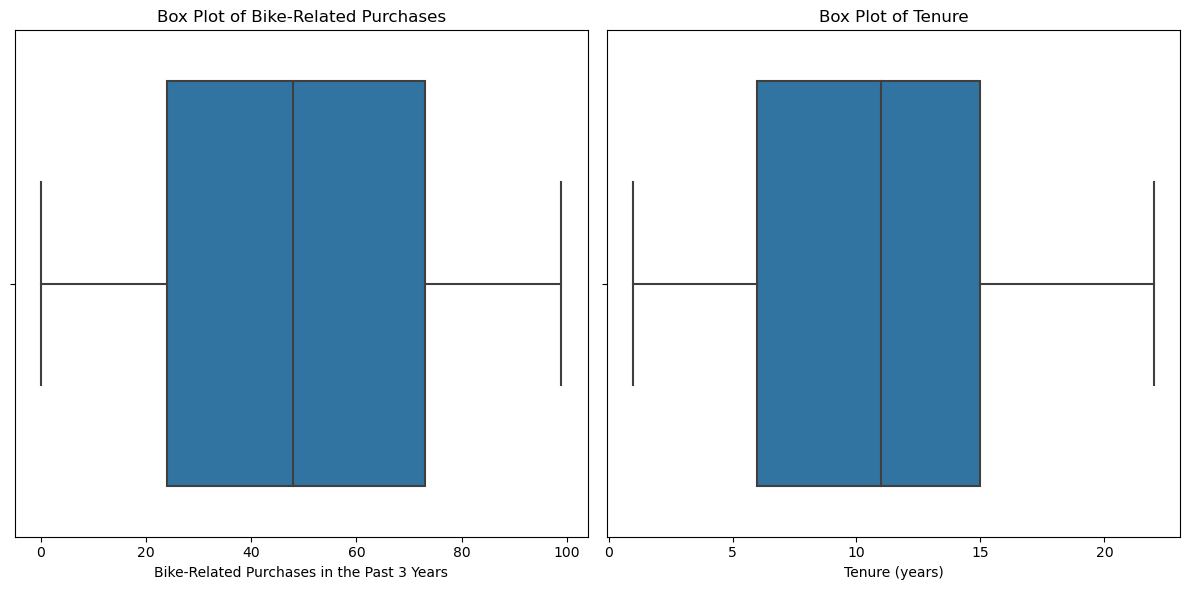

In [19]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 

# Box plot for bike-related purchases on the first subplot
sns.boxplot(x=CustomerDemographic['past_3_years_bike_related_purchases'], ax=ax[0])
ax[0].set_title('Box Plot of Bike-Related Purchases')
ax[0].set_xlabel('Bike-Related Purchases in the Past 3 Years')

# Box plot for tenure on the second subplot
sns.boxplot(x=CustomerDemographic['tenure'], ax=ax[1])
ax[1].set_title('Box Plot of Tenure')
ax[1].set_xlabel('Tenure (years)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Bike-Related Purchases:** The box plot seems fairly symmetrical, suggesting a relatively uniform distribution of purchases. There don't appear to be any extreme outliers, which indicates that the data for bike-related purchases is likely clean and well-distributed.

**Tenure:** The box plot shows a concentration of data towards the lower range of tenure years, with fewer customers having a longer tenure.

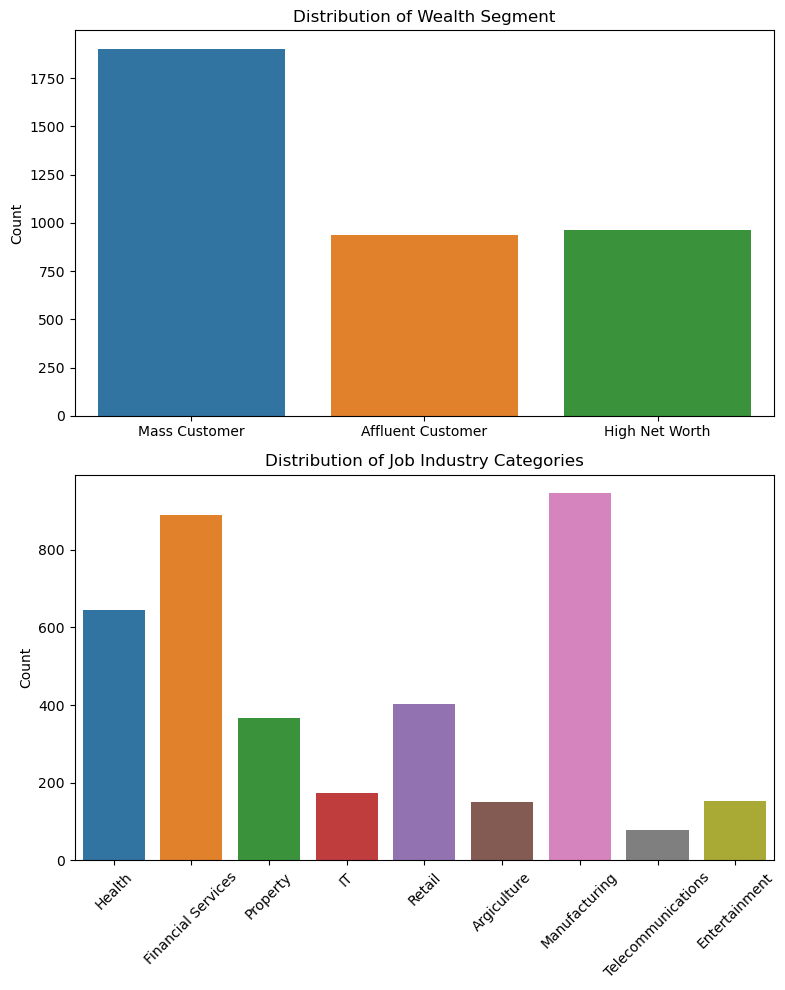

In [20]:
# Create a figure and axes for 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Count plot for wealth segment on the first subplot
sns.countplot(data=CustomerDemographic, x='wealth_segment', ax=ax[0])
ax[0].set_title('Distribution of Wealth Segment')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('')

# Count plot for job industry category on the second subplot
sns.countplot(data=CustomerDemographic, x='job_industry_category', ax=ax[1])
ax[1].set_title('Distribution of Job Industry Categories')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Wealth Segment:** The distribution shows that _Mass Customer_ is the most common wealth segment, followed by _Affluent Customer_ and _High Net Worth_. There are no apparent anomalies in this distribution, but the uneven counts may suggest a need to ensure marketing strategies are tailored to the proportions of each segment.

**Job Industry Category:** There is significant variation in the number of customers across different job industry categories. _Manufacturing_ and _Financial Services_ are particularly well-represented, whereas _Telecommunications_ has very few entries.

In [21]:
CustomerDemographic['owns_car'].value_counts()

owns_car
Yes    1928
No     1877
Name: count, dtype: int64

In [22]:
CustomerDemographic['job_title'].value_counts()

job_title
Sales Representative        91
Chemical Engineer           86
Social Worker               78
Senior Financial Analyst    74
Recruiting Manager          66
                            ..
Programmer Analyst IV        4
Health Coach III             3
Health Coach I               3
Research Assistant III       3
Developer I                  1
Name: count, Length: 195, dtype: int64

The value counts for the `owns_car` attribute indicate a nearly even split between customers who own a car and those who do not, which suggests that car ownership may not be a distinguishing factor in customer segmentation. As for the `job_title` attribute, the significant variety among job titles, with a few titles like _Sales Representative_ and _Chemical Engineer_ appearing more frequently, implies a diverse customer base. It might be beneficial to categorize these job titles into broader industry groups to simplify analysis and identify more robust trends.

We have completed a comprehensive data quality assessment of the Customer Demographic dataset from Sprocket Central Pty Ltd. The data has been cleaned for accuracy, completeness, consistency, and relevance, ensuring it is primed for effective analysis. Although minor discrepancies were addressed, the dataset is now reliable for the marketing team to identify and target potential top customers successfully.

## Customer Address

We will apply a similar meticulous approach to this dataset, scrutinizing it through the same rigorous data quality dimensions. This consistent methodology will ensure that all datasets used in our analysis meet the high standards required for informed decision-making.

In [23]:
CustomerAddress = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx', 
                                    sheet_name='CustomerAddress',
                                    skiprows=1) 
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [24]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


The Customer Address dataset comprises 3999 entries and 6 columns:

- `customer_id`: A unique identifier for each customer.
- `address`: The customer's residential address.
- `postcode`: The postal code associated with the customer's address.
- `state`: The state or territory where the customer resides.
- `country`: The country where the customer resides (all entries are Australia in this dataset).
- `property_valuation`: Indicates the valuation of the customer's property, ranging from 1 to 12.


The dataset provides essential information about customer addresses, enabling geographical analysis and targeted marketing strategies.


In [25]:
# Check for missing data
CustomerAddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [26]:
# Get duplicate rows
duplicates = CustomerAddress.duplicated(keep = False)
CustomerAddress[duplicates]

,customer_id,address,postcode,state,country,property_valuation


In [27]:
# Check for missing customer IDs (compared to CustomerDemographic dataset)

# Generate a list of customer IDs from 1 to 4000
customer_ids_range = list(range(1, 4001))

# Check which customer IDs are not present in the DataFrame
missing_customer_ids = set(customer_ids_range) - set(CustomerAddress['customer_id'])
missing_customer_ids

{3, 10, 22, 23}

In [28]:
# Check for invalid postcodes
CustomerAddress[CustomerAddress['postcode'].astype(str).str.len() != 4]

,customer_id,address,postcode,state,country,property_valuation


In [29]:
# Check for inconsistent labels
CustomerAddress['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [30]:
# Standardize 'state' labels
state_mapping = {
    'New South Wales': 'NSW',
    'Victoria': 'VIC',
    'NSW': 'NSW',
    'VIC': 'VIC',
    'QLD': 'QLD'
}
CustomerAddress['state'] = CustomerAddress['state'].map(state_mapping)

In [31]:
CustomerAddress['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

In [32]:
CustomerAddress['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

**Key Findings:**
- The dataset is complete with no missing values in any of the columns.
- No duplicate entries were found, indicating a clean dataset.
- Four customer IDs (**3, 10, 22, and 23**) are missing from the dataset, indicating a lack of corresponding address information for these customers.
- The '**state**' column contains variations such as '**New South Wales**' and '**Victoria**', which have been standardized to '**NSW**' and '**VIC**' respectively for consistency.
- All entries in the '**country**' column indicate '**Australia**', suggesting that the dataset pertains exclusively to customers within Australia.
- Property valuations range from **1** to **12**, with a mean valuation of approximately **7.51**, suggesting a varied distribution of property values among customers.


## Transactions

We will conduct a comprehensive data quality assessment on the Transactions dataset, following the same rigorous methodology used in previous sections. 

In [33]:
Transactions = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx', 
                                    sheet_name='Transactions',
                                    skiprows=1) 
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [34]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The Transactions dataset comprises 20,000 entries and 13 columns:

- `transaction_id`: A unique identifier for each transaction.
- `product_id`: The identifier for the product involved in the transaction.
- `customer_id`: The unique identifier for each customer involved in the transaction.
- `transaction_date`: The date when the transaction occurred, stored in datetime format.
- `online_order`: Indicates whether the order was placed online (1.0 for online, 0.0 for offline).
- `order_status`: The status of the order (e.g., Approved, Cancelled).
- `brand`: The brand of the product involved in the transaction.
- `product_line`: The product line/category to which the product belongs.
- `product_class`: Indicates the class/category of the product.
- `product_size`: The size of the product.
- `list_price`: The listed price of the product.
- `standard_cost`: The standard cost of the product.
- `product_first_sold_date`: The date when the product was first sold.
This dataset provides detailed information about each transaction, including product details, customer involvement, transaction specifics, and pricing information.

In the Transactions dataset, the column `product_first_sold_date` is expected to contain dates but instead contains numerical values. As this column does not provide relevant date information in its current form, it can be removed from the dataset.

In [35]:
# Drop 'product_first_sold_date' column
Transactions = Transactions.drop(['product_first_sold_date'], axis=1)

We will be excluding rows where the order status is **'Cancelled'**. Cancelled transactions usually indicate that the sale did not go through for some reason, rendering the associated data less useful for analysis. By removing these rows, we ensure that our analysis focuses on valid transactions, leading to more accurate insights and conclusions.

In [36]:
# Filter out rows where transactions are canceled
Transactions = Transactions[Transactions['order_status'] != 'Cancelled']


In [37]:
# Missing values
Transactions.isna().sum()

transaction_id        0
product_id            0
customer_id           0
transaction_date      0
online_order        354
order_status          0
brand               196
product_line        196
product_class       196
product_size        196
list_price            0
standard_cost       196
dtype: int64

In [38]:
# Rows with missing 'product_line' and 'product_id' = 0
print('No. of missing rows (all with product id:0) = ', len(Transactions[(Transactions['product_id']==0) & (Transactions['product_line'].isna())]))
print('No. of rows with product_id:0 = ', len(Transactions[Transactions['product_id']==0]))

No. of missing rows (all with product id:0) =  196
No. of rows with product_id:0 =  1371


The dataset reveals an intriguing pattern: 196 rows exhibit missing values for the columns `brand`, `product_line`, `product_class`, `product_size`, and `standard_cost`. Notably, these missing values are consistently associated with entries where the `product_id` is 0. However, it's noteworthy that 1175 rows with a `product_id` of 0 do contain data for these columns. This discrepancy suggests a potential inconsistency or data entry issue specifically affecting rows with a `product_id` of 0.


Considering that there's no reliable way to retrieve the missing information for the affected rows, and dropping them won't significantly impact the dataset due to their relatively small proportion, we have decided to proceed by dropping these rows.

In [39]:
# Remove rows with missing data
Transactions = Transactions[~Transactions['product_line'].isna()]

In [40]:
missing_revenue = (Transactions[Transactions['online_order'].isna()]['list_price'].sum()/Transactions['list_price'].sum())*100
print(f'{missing_revenue:.2f}% of the total revenue is from transactions with missing online order information.')

1.85% of the total revenue is from transactions with missing online order information.


As only **1.85%** of the total revenue originates from transactions with missing online order information. To maintain data reliability, rows with missing online order data will be removed from the dataset.

In [41]:
# Removing rows with missing 'online_order'
Transactions = Transactions[~Transactions['online_order'].isna()]

In [42]:
# Get duplicate rows
duplicates = Transactions.duplicated()
Transactions[duplicates]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost


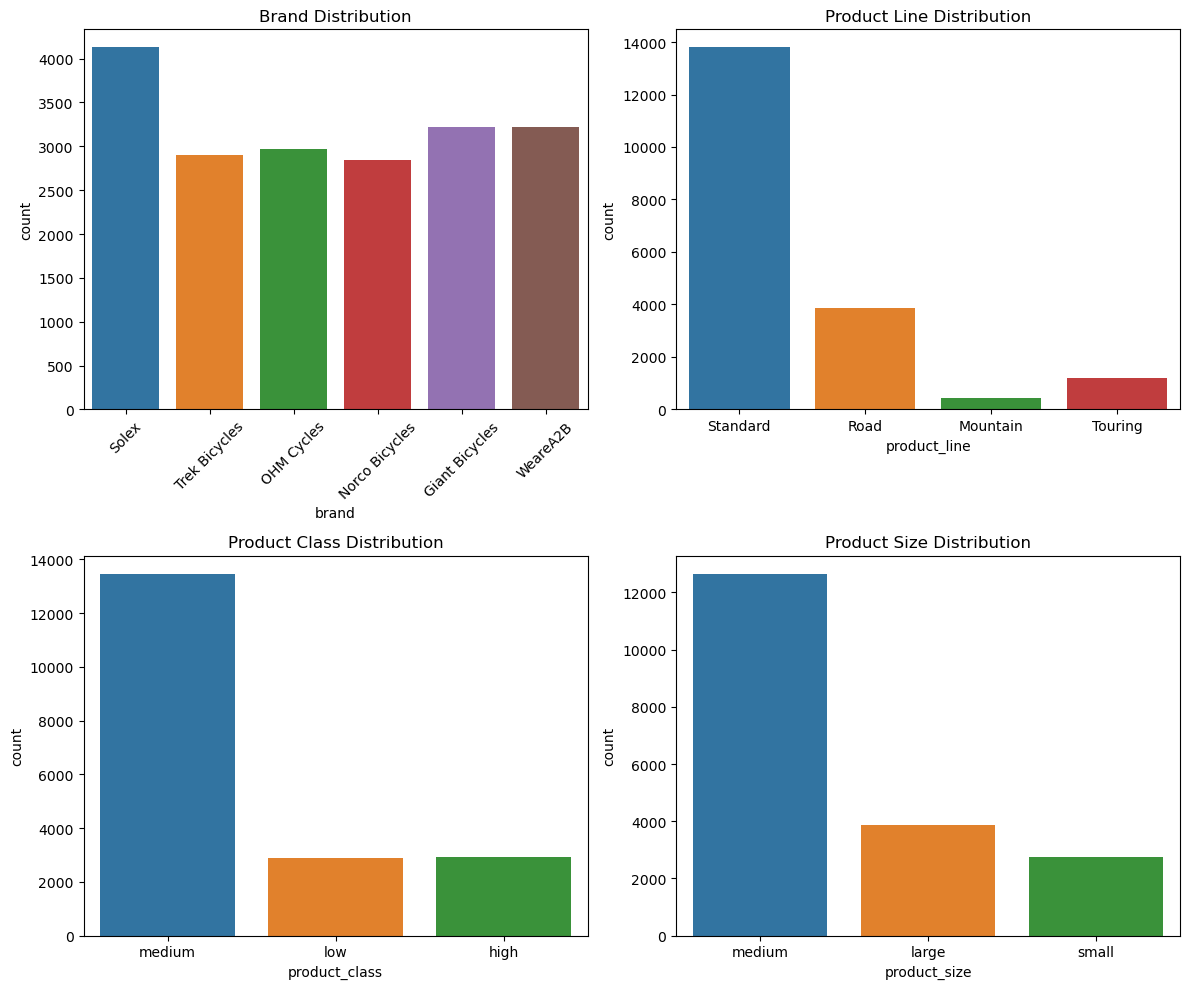

In [43]:
# Plotting graphs for data quality assessment
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Brand Distribution
sns.countplot(x='brand', data=Transactions, ax=axs[0, 0])
axs[0, 0].set_title('Brand Distribution')
axs[0, 0].tick_params(axis='x', rotation=45) 

# Product Line Distribution
sns.countplot(x='product_line', data=Transactions, ax=axs[0, 1])
axs[0, 1].set_title('Product Line Distribution')

# Product Class Distribution
sns.countplot(x='product_class', data=Transactions, ax=axs[1, 0])
axs[1, 0].set_title('Product Class Distribution')

# Product Size Distribution
sns.countplot(x='product_size', data=Transactions, ax=axs[1, 1])
axs[1, 1].set_title('Product Size Distribution')

plt.tight_layout()  
plt.show()


**Brand Distribution:** The dataset encompasses a variety of brands, with each brand contributing to the overall transactions. This diversity is crucial for a robust analysis as it covers a broad spectrum of products.

**Product Line Distribution:** The 'Standard' product line dominates the dataset, which suggests that most products fall into this category. Other product lines such as 'Road', 'Touring', and 'Mountain' are less frequent but still present, offering insights into different market segments.

**Product Class Distribution:** The 'medium' class is the most common, indicating that the majority of products fall into this middle range in terms of features or quality. The 'high' and 'low' classes are less represented but provide essential data points for understanding market dynamics.

**Product Size Distribution:** The distribution of product sizes ('medium', 'large', 'small') provides insights into customer preferences and inventory composition.

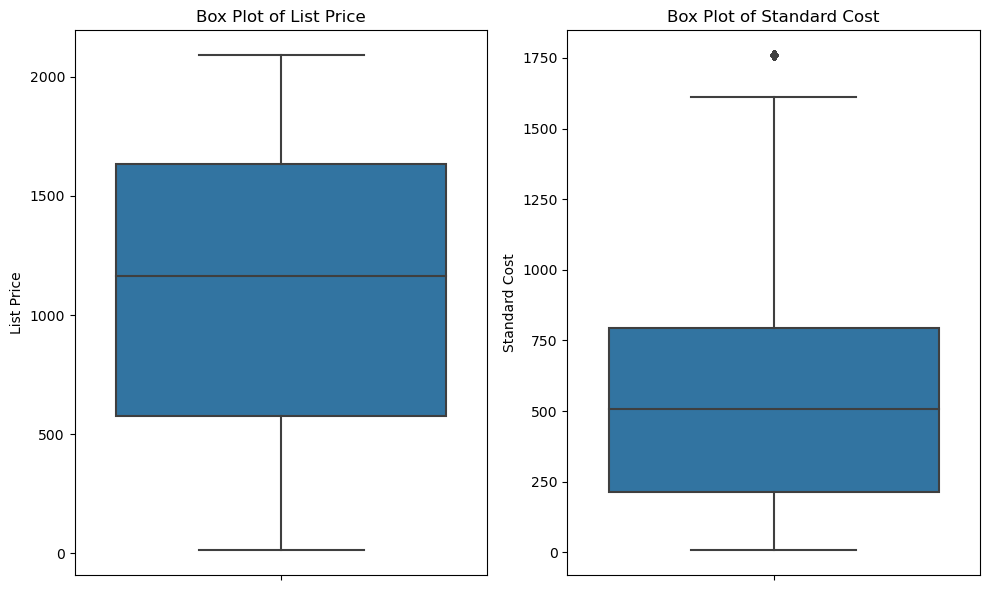

In [44]:
# Box plots for 'list_price' and 'standard_cost'
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Box plot for 'list_price'
sns.boxplot(y=Transactions['list_price'], ax=axs[0])
axs[0].set_title('Box Plot of List Price')
axs[0].set_ylabel('List Price')

# Box plot for 'standard_cost'
sns.boxplot(y=Transactions['standard_cost'], ax=axs[1])
axs[1].set_title('Box Plot of Standard Cost')
axs[1].set_ylabel('Standard Cost')

plt.tight_layout()
plt.show()


In the **Standard Cost** box plot, there is at least one outlier above the upper whisker, which is a standard cost that is unusually high compared to the rest of the dataset. The maximum **Standard Cost**, despite being an outlier, does not exceed the **List Price**, which suggests that even though the cost is high, it is still within a range where the product is profitable. Therefore, the decision could be to keep the outlier as part of the dataset, as it does not misrepresent the cost structure and could provide insights into the higher end of the production cost spectrum.

The data is now clean and primed for further analysis and modelling. We can move to data modelling and transformation with confidence, knowing that our foundation is robust.

# Data Modelling and Transformation

In this section we will merge and transform the clean datasets to extract actionable intelligence.

Our first step involves merging the Customer Demographic and Customer Address datasets. This merger is facilitated by the `customer_id` field, a unique identifier for each customer, ensuring that demographic information is accurately aligned with the corresponding address data.

By combining these datasets, we create a comprehensive view of each customer's demographic profile alongside their geographic information, enriching our analysis base.


In [45]:
# Merge Customer Demographic and Customer Address
merged_df = CustomerDemographic.merge(CustomerAddress, on = 'customer_id')
merged_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,Internal Auditor,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Retail,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,Sales Representative,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [46]:
# Convert DOB to Age
current_date = pd.to_datetime('now')
age_list = []

for index, row in merged_df.iterrows():
    dob = pd.to_datetime(row['DOB'])
    age = (current_date - dob).days // 365  # Calculate age in years
    age_list.append(age)

merged_df['age'] = age_list

# Add a column for profit 
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']
Transactions.head()

# Remove unnecessary columns
columns_to_remove = ['first_name', 'last_name', 'address', 'country', 'DOB', 'deceased_indicator']
merged_df = merged_df.drop(columns=columns_to_remove)

Understanding the age distribution of Sprocket Central's customer base is crucial. We convert the 'DOB' (Date of Birth) column into an 'age' column by calculating the difference between the current date and each customer's birth date. This transformation allows us to analyze customer segments by age, revealing potential trends and preferences.

To assess the financial contribution of each customer, we introduced a 'profit' column in the Transactions dataset. This is calculated as the difference between the 'list_price' and 'standard_cost' for each transaction.

To focus on the most impactful variables, we remove less relevant columns such as 'first_name', 'last_name', 'address', 'country', 'DOB', and 'deceased_indicator'. This streamlining process ensures that our analysis is concentrated on the factors most likely to influence customer value and behavior

In [47]:
# Group by 'customer_id' and calculate multiple aggregations
agg_dict = {
    'profit': 'sum',
}

customer_profit_df = Transactions.groupby('customer_id').agg(agg_dict).reset_index()
customer_profit_df.columns = ['customer_id', 'total_profit']

merged_df = merged_df.merge(customer_profit_df, on = 'customer_id')
# merged_df.to_csv('data/final_df.csv', index=False)
# Transactions.to_csv('data/transactions.csv', index=False)
merged_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,age,total_profit
0,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,2016,NSW,10,70,3018.09
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,2153,NSW,10,43,2226.26
2,4,Male,33,Internal Auditor,IT,Mass Customer,No,7.0,4211,QLD,9,62,220.57
3,5,Female,56,Senior Editor,Retail,Affluent Customer,Yes,8.0,2448,NSW,4,46,2394.94
4,6,Male,35,Sales Representative,Retail,High Net Worth,Yes,13.0,3216,VIC,9,57,3946.55


We aggregate the Transactions data at the customer level to summarize each customer's total profit generated. This aggregation provides a clear view of customer engagement and financial contribution. By integrating this transaction summary with the merged demographic and address data, we establish a robust dataset for subsequent analysis.

Now we have a rich dataset that combines demographic, geographic, and transactional insights. By applying analytical models to this dataset, we aim to uncover the defining characteristics and behaviors of Sprocket Central's most valuable customers. These insights will be instrumental in guiding targeted marketing strategies, ensuring that efforts are concentrated on engaging leads with the highest potential for conversion and long-term value addition.

# Data Insights

In this section, we'll use the data to extract key insights. We aim to unveil the patterns and trends that define the value and behavior of customers, leveraging this understanding to identify those with the highest potential for future transactions. These insights will inform targeted marketing strategies, driving growth by focusing on the most promising customer segments.

The insights have been generated using Tableau, which has allowed for an interactive and dynamic exploration of Sprocket Central Pty Ltd's customer data. The resulting patterns and trends unearthed through this analysis are crucial in identifying high-potential customer segments for targeted marketing strategies. You can view the detailed dashboards by following this [Tableau Dashboard](https://public.tableau.com/views/SprocketCentralAnalysis_16999690683590/StrategicCustomerTargeting?:language=en-GB&publish=yes&:sid=&:display_count=n&:origin=viz_share_link). The visualizations below display our insights derived from the data.

<img src="Profit Insights Overview.png"/>

The "Profit Insights Overview" dashboard presents a detailed breakdown of Sprocket Central Pty Ltd's customer data, offering a visualization of the profit distribution across various customer segments.

### Gender Distribution
The profit generated by male and female customers is nearly balanced, indicating gender neutrality in spending:

- **Male**: 51.205%
- **Female**: 48.795%

### Profit Trends Across Age Groups
Profitability increases with customer age, highlighting the value of the older demographic:

- **21-30**: Lower profit generation
- **31-40**: Moderate profit generation
- **41-50 & 50+**: Highest profit generation, indicating that targeting older age groups may yield higher returns.

### Revenue Distribution Across Wealth Segments
Analysis of wealth segments reveals a strategic insight into where the majority of the profits are sourced:

- **Affluent Customer**: Substantial contribution to profit
- **High Net Worth**: Significant profit but fewer individuals
- **Mass Customer**: The largest profit source, suggesting that volume plays a crucial role.

### Profit Distribution Across Job Industries
The distribution of profit across job industries indicates which sectors are more lucrative:

- **Finance**: Leading in profit contribution, a key industry to target.
- **Health**: Moderate contribution, potentially a steady market.
- **Manufacturing**: Second to Finance, indicating a high-value customer base.

These insights can guide Sprocket Central Pty Ltd in crafting targeted marketing strategies that focus on the most profitable customer segments, specifically older demographics and professionals in Finance and Manufacturing sectors.


<img src="Strategic Revenue Insights.png"/>

This section explores the key revenue-generating factors from Sprocket Central Pty Ltd's customer data, revealing strategic insights that could inform future marketing and sales efforts.

### Insights on Purchase Frequency
- **High-Frequency Purchasers**: Customers with over **50+ bike-related purchases** in the past three years are responsible for a significant **48.33%** of the total profit.
- **Mid-Frequency Purchasers**: Those with **11-30** and **31-50 purchases** account for **20.80%** and **20.62%** of the profit, respectively, suggesting a strong positive correlation between purchase frequency and profit.

### Geographic Revenue Insights
- **Top Earning Postcodes**: Postcode **02153** leads with revenue above **\\$80K**. Other top postcodes like **02170**, **02763**, and **02065** each contribute over **\\$40K**, pointing to the importance of geographic targeting.

### Revenue Distribution by State
- **State Revenue Leaders**: **NSW** tops the revenue chart with **\\$5.35M**, followed by **VIC** at **\\$2.58M**, and **QLD** at **\\$2.15M**. These figures highlight regional differences in spending power and potential.

### Customer Tenure and Property Investment
- **Tenure and Valuation as Profit Indicators**: Customers with tenures of **7 and 11 years** and property valuations of **8 and 9** stand out as high-profit groups. This suggests that fostering long-term relationships and understanding property investment levels can be lucrative.

These strategic insights can be instrumental for Sprocket Central Pty Ltd in refining their targeting strategy to focus on high-frequency purchasers, key geographic areas, and long-term customers with significant property investments to maximize revenue generation.


# Predicting Top Potential Customers

The valuable insights derived from Sprocket Central Pty Ltd's existing customer data set the stage for a strategic approach to identifying potential high-value customers in the new dataset. Here’s how we intend to utilize these insights:

- **Prioritizing Frequent Purchasers**: We will look for patterns in the new dataset that resemble the high purchase frequency of past customers, especially those with over 50 bike-related purchases, as they are associated with a substantial profit margin.

- **Geographical Targeting**: By analyzing the geographical data of the new customers, we will prioritize outreach to those in the top-performing postcodes and states.

- **Leveraging Tenure and Valuation**: For the new customers who are property owners, we will assess their property valuation as a proxy for investment potential. Combined with any available data on customer engagement or related interests, we can infer the likelihood of higher profitability.

- **Profiling Based on Age and Wealth Segments**: The new dataset will be segmented to focus on the older demographics and wealth segments that have shown higher profitability, aligning marketing efforts with the most lucrative customer profiles.

By applying these focused strategies to the new dataset, we can effectively single out individuals who not only have the potential to become high-value customers but also resemble our current top-performing customer segments. This targeted approach aims to expand the customer base strategically while ensuring resource allocation is optimized for maximum return on investment.


In [48]:
new_customers = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx', 
                                    sheet_name='NewCustomerList',
                                    skiprows=1) 
new_customers.head()


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.53,0.6625,0.828125,0.703906,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.00,1.0000,1.250000,1.062500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.05,1.0500,1.050000,1.050000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.60,0.7500,0.750000,0.750000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.07,1.0700,1.337500,1.337500,4,4,1.703125


In [49]:
# Convert DOB to Age
current_date = pd.to_datetime('now')
age_list = []

for index, row in new_customers.iterrows():
    dob = pd.to_datetime(row['DOB'])
    age = (current_date - dob).days // 365  # Calculate age in years
    age_list.append(age)

new_customers['age'] = age_list

## Customer Scoring System

We will create a scoring system developed to evaluate the potential value of new customers based on the insights from existing customer datset. 

- **Bike Purchase Weight**: 
  - `50+ purchases`: Weight of `5`. *High engagement and potential value.*
  - `11-49 purchases`: Weight of `2`. *Consistent patronage.*
  - `0-10 purchases`: Weight of `1`. *Occasional shoppers.*

- **Property Valuation Weight**:
  - `Valuation 8 & 9`: Highest weight of `5`. *Correlates with high profitability.*
  - `Valuation 7 & 10`: Moderate weight of `3`. *Above-average profitability.*
  - `Valuation 6, 4, 5, 11, & 12`: Lower weight of `2`. *Significant but lesser impact.*

- **State Weight**:
  - `NSW`: Highest weight of `5`. *Top contributor to revenue.*
  - `VIC`: Weight of `2.5`. *Significant contribution.*
  - `QLD`: Weight of `2`. *Notable contribution.*

- **Age Weight**:
  - `50+ years`: Highest weight of `5`. *High-value mature customers.*
  - `40-49 years`: Weight of `4.5`. *Growing profitability with age.*
  - `30-39 years`: Weight of `2.5`. *Potential for future growth.*
  - `Under 30 years`: Weight of `2`. *Emerging customer base.*

- **Wealth Segment Weight**:
  - `Mass Customer`: Highest weight of `5`. *Major profit contributors.*
  - `Affluent Customer` & `High Net Worth`: Weight of `3`. *Substantial contributions.*

- **Industry Weight**:
  - `Financial Services` & `Manufacturing`: Highest weight of `5`. *Leaders in profit generation.*
  - `Health`: Weight of `4`. *Stable market segment.*
  - `Retail` & `Property`: Weight of `2`. *Smaller, impactful contribution.*

- **Overall Potential Value Score**:
  - A composite score that combines all individual weights to assess each customer's potential value.

- **Sorting for Targeting**:
  - Customers are ranked by their potential value score in descending order to prioritize marketing efforts.


In [50]:
# Define a function to determine the weight based on bike purchases
def get_bike_purchase_weight(purchases):
    if purchases >= 50:
        return 5
    elif purchases >= 11:
        return 2
    else:
        return 1

# Apply the function to the 'past_3_years_bike_related_purchases' column
new_customers['bike_purchase_weight'] = new_customers['past_3_years_bike_related_purchases'].apply(get_bike_purchase_weight)


# Define the weights for tenure and property valuation (hypothetical example)
property_valuation_weights = {8: 5, 9: 5, 7: 3, 10: 3, 
                              6: 2, 4: 2, 5: 2, 11: 2, 
                              12: 2} # High profit for property valuation 8 and 9


def get_property_valuation_weight(property_valuation):
    return property_valuation_weights.get(property_valuation, 1)

# Apply the functions to the respective columns
new_customers['property_valuation_weight'] = new_customers['property_valuation'].apply(get_property_valuation_weight)


# Define the weights for State
state_weights = {'NSW': 5, 'VIC': 2.5, 'QLD': 2}

# Define the weights for age
age_bins = [30, 40, 50]  # Bins for age groups
age_weights = [2, 2.5, 4.5, 5]

# Define the weights for wealth segment
wealth_segment_weights = {'Mass Customer': 5, 'Affluent Customer': 3, 'High Net Worth': 3}  
industry_weights = {'Financial Services': 5, 'Manufacturing': 5, 'Health': 4, 'Retail': 2, 'Property':2} 



# Update the potential value score calculation to include the new weights
new_customers['potential_value_score'] = new_customers.apply(lambda row: row['bike_purchase_weight'] +
                                                            state_weights.get(row['state'], 0) +
                                                            age_weights[np.digitize(row['age'], bins=age_bins)] +
                                                            wealth_segment_weights.get(row['wealth_segment'], 0) +
                                                            industry_weights.get(row['job_industry_category'], 1) +
#                                                             row['postcode_weight'] +
                                                            row['property_valuation_weight'],
                                                            axis=1)

# Sort and display the top 10 customers with the highest potential value scores
new_customers.sort_values(by='potential_value_score', ascending=False, inplace=True)

new_customers[['first_name', 'last_name', 'gender', 'age', 'past_3_years_bike_related_purchases', 
               'job_industry_category', 'wealth_segment', 'state']].head(10)

,first_name,last_name,gender,age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,state
177,Omero,McDonand,Male,71.0,51,Manufacturing,Mass Customer,NSW
146,Tyne,Coate,Female,58.0,82,Manufacturing,Mass Customer,NSW
424,Cheston,Hritzko,Male,78.0,70,Manufacturing,Mass Customer,NSW
412,Hilliard,Dullard,Male,69.0,65,Manufacturing,Mass Customer,NSW
366,Daisi,Tinwell,Female,52.0,84,Financial Services,Mass Customer,NSW
335,Haskell,Moxted,Male,80.0,81,Manufacturing,Mass Customer,NSW
570,Karol,Salthouse,Female,55.0,53,Financial Services,Mass Customer,NSW
606,Maximilian,Geffen,Male,68.0,96,Manufacturing,Mass Customer,NSW
231,Danny,Bodle,Male,80.0,50,Manufacturing,Mass Customer,NSW
719,Inglebert,Butland,Male,58.0,71,Financial Services,Mass Customer,NSW


In [51]:
new_customers[['first_name', 'last_name', 'gender', 'age', 'past_3_years_bike_related_purchases', 
               'job_industry_category', 'wealth_segment', 'state']].head(10).to_csv('new_customers.csv')


# Conclusion

The comprehensive data cleaning and analysis conducted on the datasets provided by Sprocket Central Pty Ltd have successfully enhanced the quality and reliability of the data. This meticulous process has laid a solid foundation for in-depth analysis and insightful decision-making. Here are the key takeaways and the resultant strategic direction for Sprocket Central Pty Ltd:

### Data Cleaning and Preparation

- **Customer Demographic**: Corrected data inconsistencies, imputed missing values, and standardized date formats have resulted in a dataset ready for precise segmentation and profiling.
  
- **Customer Address**: Standardization of state fields and verification of postcode accuracy ensure that geographical data supports targeted marketing initiatives.
  
- **Transactions**: By focusing on actual sales data and validating the authenticity of outliers, the transactions dataset is now an accurate reflection of customer purchasing behavior.

### Strategic Application of Insights

Our analysis has identified a segment of customers who demonstrate high engagement and a history of profitability. Their defining characteristics include:

- **Engagement**: High frequency of bike-related purchases signals strong customer interest and potential for ongoing engagement.
- **Industry and Wealth**: Predominantly involved in Manufacturing and Financial Services and categorized within the 'Mass Customer' wealth segment.
- **Demographics**: A trend towards an older demographic suggests higher spending power and profitability.
- **Geography**: A significant number of these high-potential customers are based in New South Wales, a top-performing region in terms of revenue.

With these insights, Sprocket Central Pty Ltd is equipped to deploy targeted marketing strategies that promise higher conversion rates and customer retention. By focusing on this identified high-value customer segment, the company can ensure that marketing resources are invested where they are most likely to yield a substantial return. In sum, this project has not only clarified the profile of high-value targets but has also provided Sprocket Central Pty Ltd with actionable insights to navigate the competitive marketplace effectively. The data-led approach adopted here promises to foster strong customer relationships and drive the company's growth and market presence.
